Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Example 9.53 and Figure 9.24

Confidence intervals for the population correlation coefficient between height and foot length in a scenario where we know the true population correlation coefficient\
Topics and relevant videos: [Correlation coefficient, sample correlation coefficient](https://www.youtube.com/watch?v=LMKnAVH-J3U), [the bootstrap, bootstrap Gaussian confidence intervals](https://www.youtube.com/watch?v=yeiMMzjDTWs), [bootstrap percentile confidence intervals, Fisher's transformation](https://www.youtube.com/watch?v=81ehHDB1Owo)

Author: Carlos Fernandez-Granda\
Data source: http://mreed.umtri.umich.edu/mreed/downloads.html

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import time
import matplotlib
from scipy.stats import norm
from scipy import stats
from numpy.random import default_rng
# matplotlib.rcParams['text.usetex'] = True

font_size = 15
font_size_legend = 15
font_size_ticks = 15
font_size_small = 12

# alldata = pd.read_csv ("../data/ANSUR II MALE Public.csv", encoding='latin-1')

url = "https://raw.githubusercontent.com/cfgranda/ps4ds/main/data/ANSUR%20II%20MALE%20Public.csv"

alldata = pd.read_csv(url, encoding='latin-1')

stature = alldata['stature'] / 10.
foot = alldata['footlength']/10.

stature_min = stature.min()
stature_max = stature.max()
foot_min = foot.min()
foot_max = foot.max()

data = np.stack((stature,foot))

rho_pop = np.corrcoef(data)[0,1]
print("Population correlation coefficient: " + str(round(rho_pop,3)))

Population correlation coefficient: 0.718


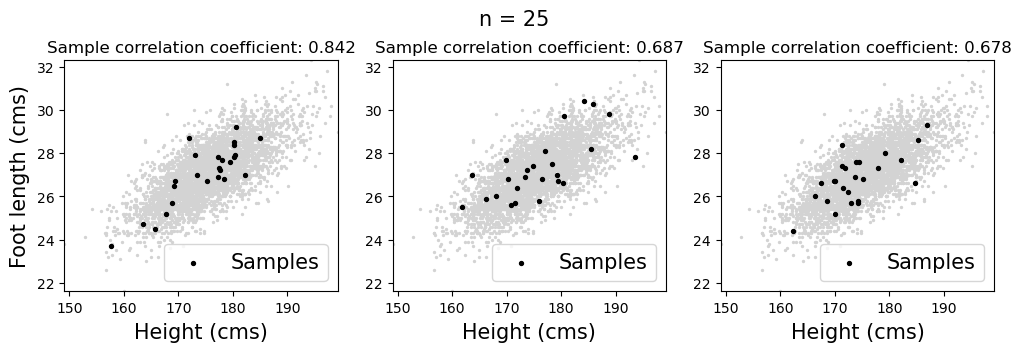

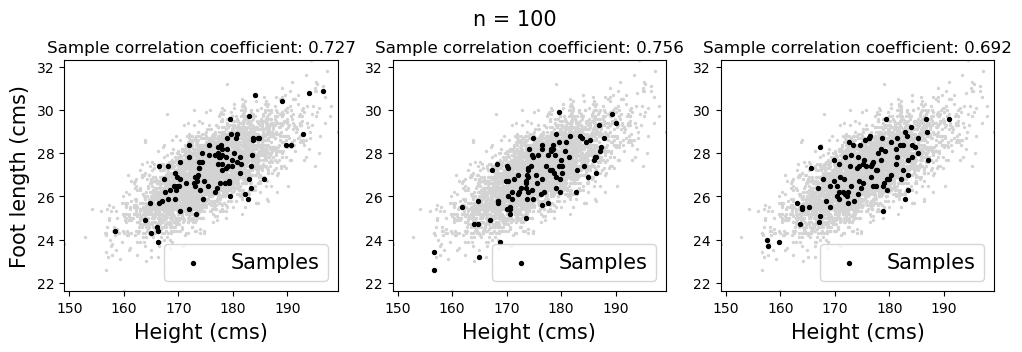

In [5]:
rng = default_rng(2021)

n_vals = [25,100]

tries_plot = 3
markersize =4

for n in n_vals:
    fig, axes = plt.subplots(1, 3, figsize=(12,3),width_ratios=[1,1,1])
    fig.suptitle("n = " + str(n),fontsize=font_size,y = 1.05)

    for ind in range(tries_plot):
    
        indices = rng.choice(data.shape[1],n,replace=True)
        sample_rho = np.corrcoef(data[:,indices])[0,1]
        axes[ind].scatter(stature,foot,s=2,color="lightgray",rasterized=True)
        axes[ind].scatter(stature[indices],foot[indices],s=8,color="black",rasterized=True,label='Samples')
        axes[ind].set_ylim([foot_min,foot_max])
        axes[ind].set_xlim([stature_min,stature_max])
        axes[ind].set_xlabel('Height (cms)',fontsize=font_size,labelpad = 5)
        if ind == 0:
            axes[ind].set_ylabel('Foot length (cms)',fontsize=font_size,labelpad = 5)
        axes[ind].legend(fontsize=font_size_legend,loc="lower right")
        axes[ind].set_title("Sample correlation coefficient: "+str(round(sample_rho,3)),fontsize=font_size_small);

In [6]:
tries = int(1e6)

sample_rhos_list = []
for n in n_vals:
    sample_rhos = np.zeros(tries)
    for ind_tries in range(tries):
        indices = rng.choice(data.shape[1],n,replace=True)
        sample_rhos[ind_tries] = np.corrcoef(data[:,indices])[0,1]
    sample_rhos_list.append(sample_rhos)

n = 25, standard error = 0.107
n = 100, standard error = 0.051


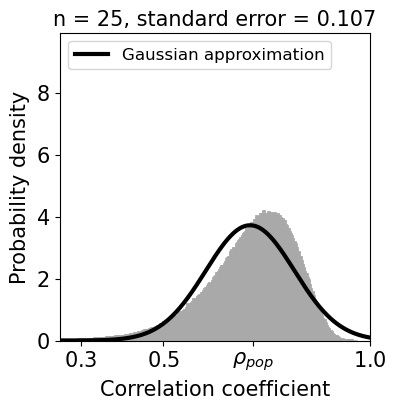

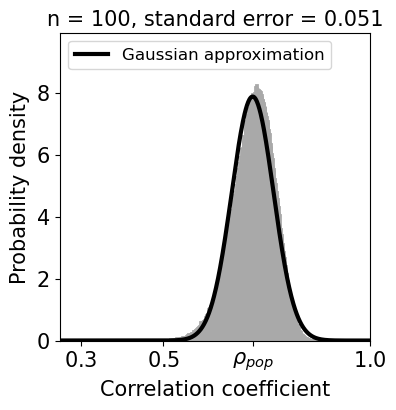

In [7]:
n_bins=400

x = np.linspace(0,1,1000)
x_min = 0.25
x_max = 1
y_max =  9.95#5.75

for ind_n,n in enumerate(n_vals):
    
    sample_rhos = sample_rhos_list[ind_n]
    mu = np.mean(sample_rhos)
    sigma = np.std(sample_rhos)
    
    print("n = " + str(n) + ", standard error = " + str(round(sigma,3)))

    plt.figure(figsize=(4,4))
    plt.xticks([0.1,0.3,0.5,0.718,1],[r'$0.1$',r'$0.3$',r'$0.5$',r'$\rho_{pop}$',r'$1.0$'],fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.hist(sample_rhos,bins=n_bins,color='darkgray', edgecolor='darkgray',
                  linewidth=2,density=True)
    plt.plot(x,norm.pdf(x,mu,sigma),lw=3,color="black",label='Gaussian approximation')
    plt.xlim([x_min,x_max])
    plt.ylim([0,y_max])
    plt.ylabel(r"Probability density",fontsize=font_size,labelpad=5)
    plt.xlabel('Correlation coefficient',fontsize=font_size,labelpad=5)
    plt.legend(fontsize=font_size_small,loc="upper left")
    plt.title("n = " + str(n)+ ", standard error = " + str(round(sigma,3)),fontsize=font_size,pad=5);

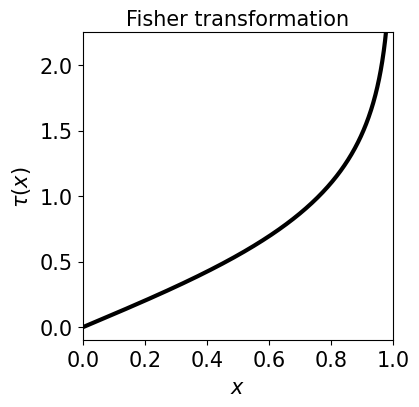

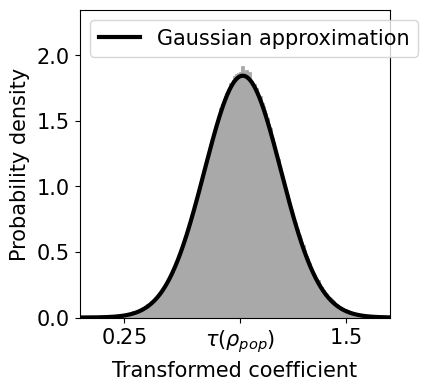

In [5]:
# The Fisher transformation renders the distribution of the sample correlation coefficient approximately Gaussian
def fisher_transformation(x):
    return 0.5 * np.log( (1+x) / (1-x))

def inverse_fisher_transformation(y):
    return (np.exp(2*y) - 1) / (np.exp(2*y) + 1)

sample_rhos = sample_rhos_list[0]

transformed_rhos = fisher_transformation(sample_rhos)
transformed_rho_pop = fisher_transformation(rho_pop)

x_min_fisher = 0 # 0.45
x_max_fisher = 1.75 # 1.35
x = np.linspace(x_min_fisher,x_max_fisher,1000)
y_max_fisher = 2.35

mu = np.mean(transformed_rhos)
sigma = np.std(transformed_rhos)

y_max = 2.25
x_vals = np.linspace(0,1,1000)[:-1] # remove last entry to avoid dividing by zero
transformed_vals = 0.5 * np.log( (1+x_vals) / (1-x_vals))
plt.figure(figsize=(4,4))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.plot(x_vals,transformed_vals,lw=3,color="black")
plt.xlim([0,1])
plt.ylim([-0.1,y_max])
plt.ylabel(r"$\tau(x)$",fontsize=font_size,labelpad=5)
plt.xlabel(r'$x$',fontsize=font_size,labelpad=5)
plt.title(r'Fisher transformation',fontsize=font_size,pad=5)

plt.figure(figsize=(4,4))
plt.xticks([0.25,0.9036,1.5],[r'$0.25$',r'$\tau(\rho_{pop})$',r'$1.5$'],fontsize=font_size_ticks) 
plt.xticks(fontsize=font_size_ticks)
plt.yticks(fontsize=font_size_ticks)
plt.hist(transformed_rhos,bins=n_bins,color='darkgray', edgecolor='darkgray',
              linewidth=2,density=True)
plt.plot(x,norm.pdf(x,mu,sigma),lw=3,color="black",label='Gaussian approximation')
plt.ylim([0,y_max_fisher])
plt.xlim([x_min_fisher,x_max_fisher])
plt.ylabel(r"Probability density",fontsize=font_size,labelpad=5)
plt.xlabel('Transformed coefficient',fontsize=font_size,labelpad=5)
plt.legend(fontsize=font_size_small,loc="upper left");

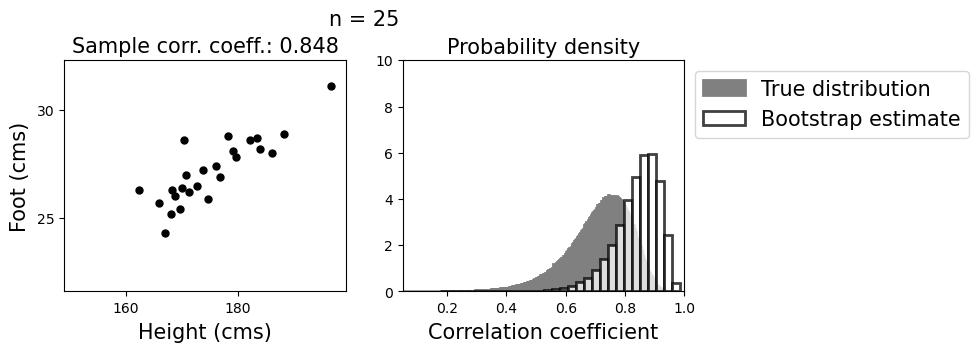

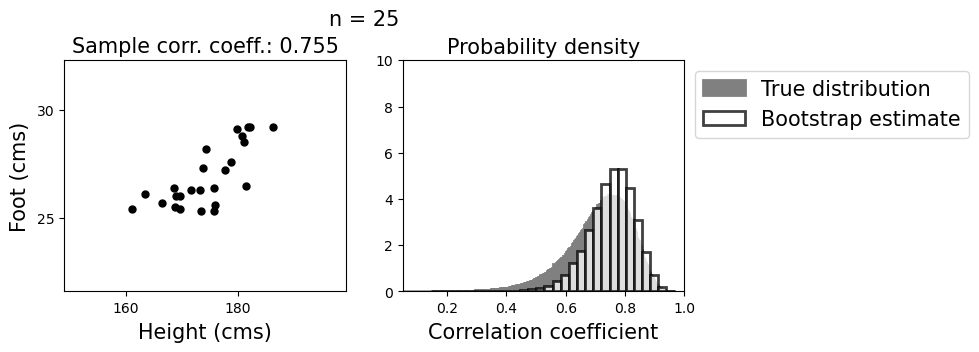

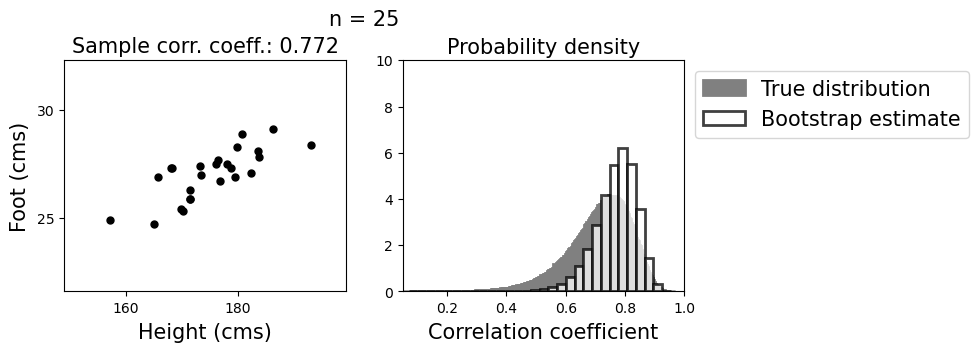

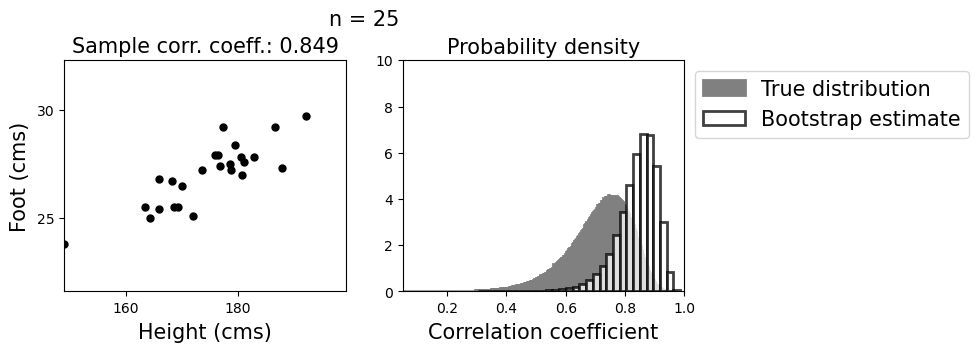

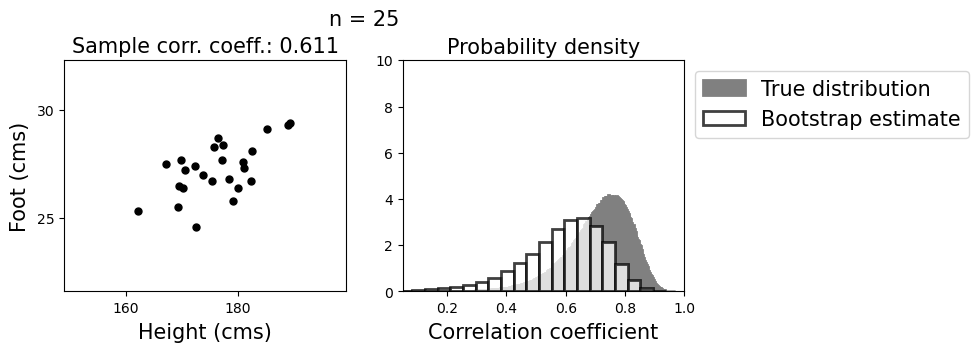

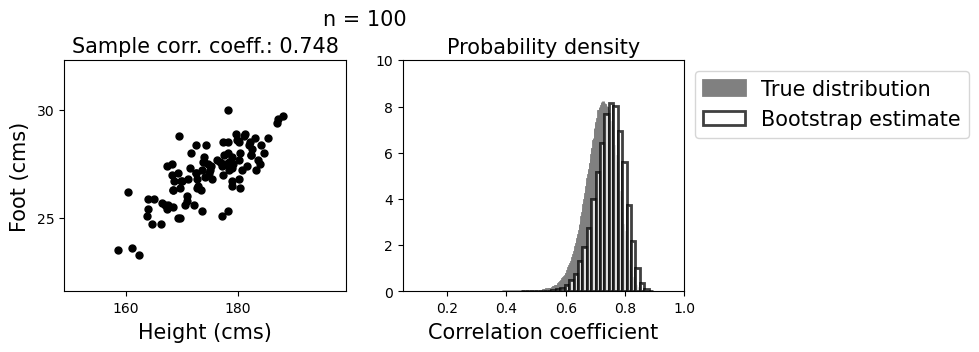

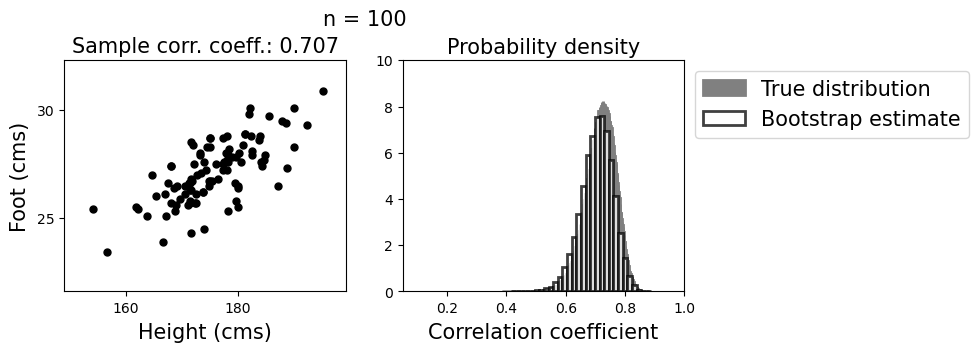

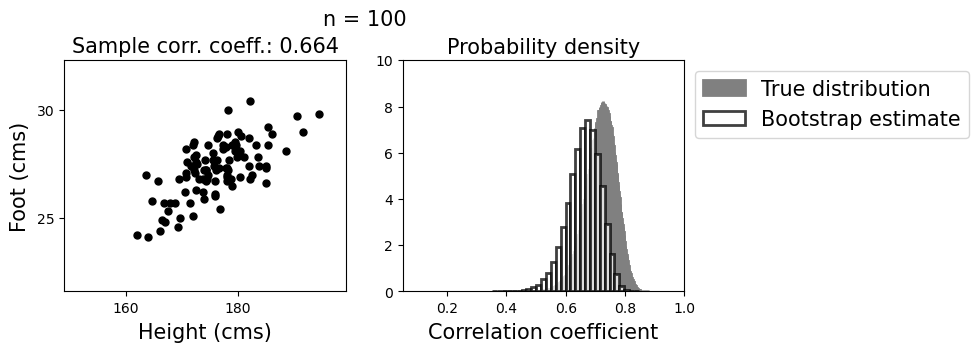

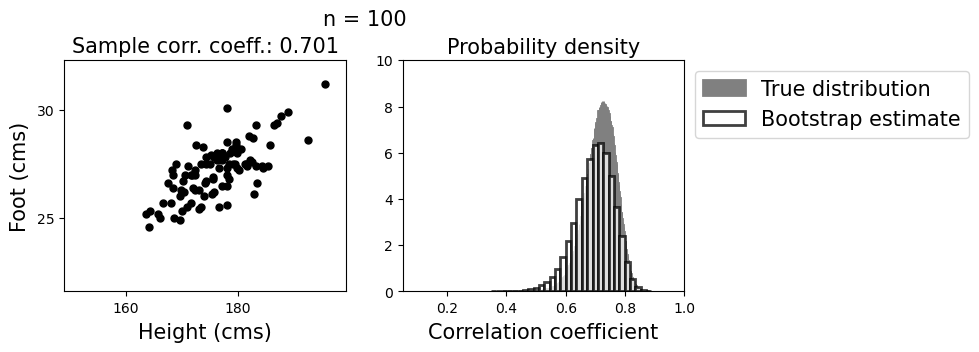

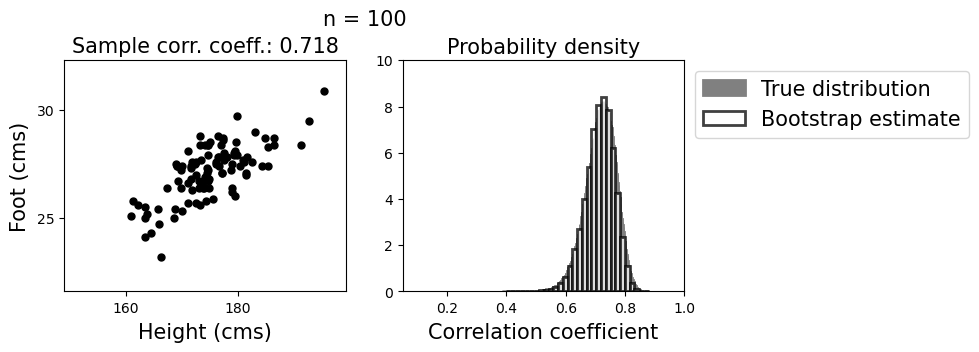

In [6]:
# Bootstrap estimate of the distribution of the sample correlation coefficient
rng = default_rng(2023)

tries_bs = 5
markersize = 4
n_bs = int(1e5)

x_min = 0.05
x_max = 1
y_max = 10

n_bins_bs = 30

for ind_n,n in enumerate(n_vals):
    
    sample_rhos = sample_rhos_list[ind_n]


    for ind in range(tries_bs):

        fig, axes = plt.subplots(1, 2, figsize=(8,3),width_ratios=[1,1])
        fig.suptitle("n = " + str(n),fontsize=font_size,y = 1.05)
    
        indices = rng.choice(data.shape[1],n,replace=True)
        samples = data[:,indices]
        sample_rho = np.corrcoef(samples)[0,1]
        axes[0].scatter(stature[indices],foot[indices],s=25,color="black",rasterized=True,label='Samples')
        axes[0].set_xticks([160,180]) 
        axes[0].set_yticks([25,30])
        axes[0].set_ylim([foot_min,foot_max])
        axes[0].set_xlim([stature_min,stature_max])
        axes[0].set_xlabel('Height (cms)',fontsize=font_size,labelpad = 5)
        axes[0].set_ylabel('Foot (cms)',fontsize=font_size,labelpad = 5)
        axes[0].set_title("Sample corr. coeff.: "+str(round(sample_rho,3)),fontsize=font_size_legend)
        
        rhos_bs = np.zeros(n_bs)
        for ind_bs in range(n_bs):
            indices_bs = rng.choice(samples.shape[1],n,replace=True)
            samples_bs = samples[:,indices_bs]
            rhos_bs[ind_bs] = np.corrcoef(samples_bs)[0,1]
        
        axes[1].hist(sample_rhos,bins=n_bins,color='gray', edgecolor='gray',
                      linewidth=2,density=True,label="True distribution")
        axes[1].hist(rhos_bs,bins=n_bins_bs,color='white', edgecolor='black',alpha=0.75,
                      linewidth=2,density=True,label="Bootstrap estimate")
        axes[1].set_xlim([x_min,x_max])
        axes[1].set_ylim([0,y_max])
        axes[1].set_xlabel('Correlation coefficient',fontsize=font_size,labelpad=5)
        axes[1].legend(fontsize=font_size_legend,bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
        axes[1].set_title(r"Probability density",fontsize=font_size,pad=5);

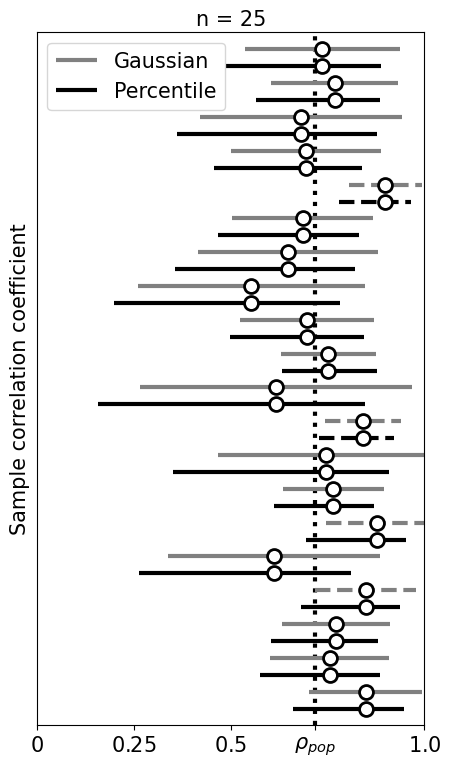

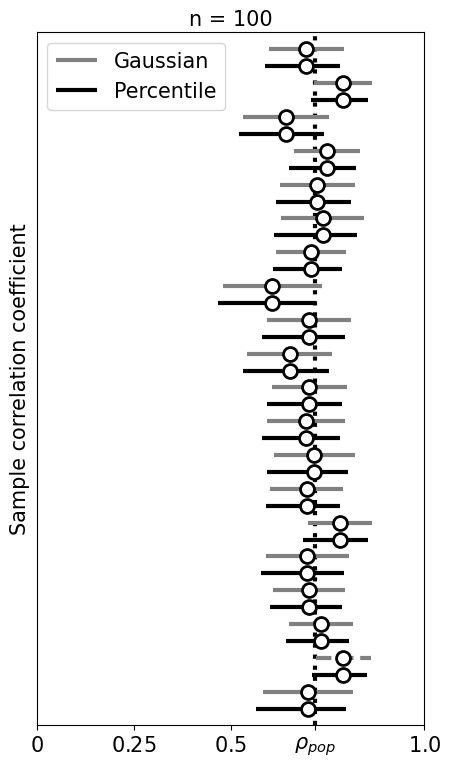

In [7]:
# Bootstrap Gaussian and percentile confidence intervals for the population correlation coefficient
rng = default_rng(2023)
x_min = 0
x_max = 1

n_vals = [25,100] 
tries = 20
n_bs = int(1e5)
verbose = False

for ind_n,n in enumerate(n_vals):
    plt.figure(figsize=(5,9))
    plt.xticks([0,0.25,0.5,0.718,1],[r'$0$',r'$0.25$',r'$0.5$',r'$\rho_{pop}$',r'$1.0$'],fontsize=font_size) 
    plt.yticks([]) 
    plt.vlines(rho_pop, -1,2*tries,lw=3,ls="dotted",color="black")
    plt.xlim(x_min,x_max)
    plt.ylim(-1, 2 * tries)
    plt.ylabel(r"Sample correlation coefficient",fontsize=font_size,labelpad=5)
    for ind in range(tries):
        if verbose:
            print(ind)
        indices = rng.choice(data.shape[1],n,replace=True)
        samples = data[:,indices]
        sample_rho = np.corrcoef(samples)[0,1]
        rhos_bs = np.zeros(n_bs)
        for ind_bs in range(n_bs):
            indices_bs = rng.choice(samples.shape[1],n,replace=True)
            samples_bs = samples[:,indices_bs]
            rhos_bs[ind_bs] = np.corrcoef(samples_bs)[0,1]
        se_bs = np.std(rhos_bs)
        Phi_inv = 1.96 # Inverse cdf of 1-0.05/2
        l_norm = sample_rho - Phi_inv * se_bs
        u_norm = sample_rho + Phi_inv * se_bs
        
        if u_norm < rho_pop or l_norm > rho_pop:
            plt.hlines(2*ind+1,l_norm,u_norm,lw=3,color="gray",ls="dashed")
            if verbose:
                print("Out!")
        else:
            if ind == 0:
                plt.hlines(2*ind+1,l_norm,u_norm,lw=3,color="gray",label="Gaussian")
            else:
                plt.hlines(2*ind+1,l_norm,u_norm,lw=3,color="gray")
        plt.plot(sample_rho,2*ind+1,"o",markersize=10,markeredgewidth=2,markerfacecolor = "white",markeredgecolor = "black")
        
        [l_perc,u_perc] = np.percentile(rhos_bs,[2.5, 97.5])
        
        if u_perc < rho_pop or l_perc > rho_pop:
            plt.hlines(2*ind,l_perc,u_perc,lw=3,color="black",ls="dashed")
            if verbose:
                print("Out!")
        else:
            if ind == 0:
                plt.hlines(2*ind,l_perc,u_perc,lw=3,color="black",label="Percentile")
            else:
                plt.hlines(2*ind,l_perc,u_perc,lw=3,color="black")
        plt.plot(sample_rho,2*ind,"o",markersize=10,markeredgewidth=2,markerfacecolor = "white",markeredgecolor = "black")
    plt.legend(fontsize=font_size_legend,loc="upper left")
    plt.title("n = " + str(n),fontsize=font_size,pad=5)

In [8]:
# Comparison between Gaussian and percentile confidence intervals, can take a while to run!
rng = default_rng(2022)
n_vals = [25,100] 
tries = int(1e3) # set 1e4 for results in book
n_bs = int(1e3) # set 1e3 for results in book
verbose = False

for ind_n,n in enumerate(n_vals):
    print("n = " + str(n))
    out_gaussian = 0
    out_percentile = 0
    average_length_gaussian = 0.
    average_length_percentile = 0.
    start = time.time()
    for ind in range(tries):
        indices = rng.choice(data.shape[1],n,replace=True)
        samples = data[:,indices]
        sample_rho = np.corrcoef(samples)[0,1]
        rhos_bs = np.zeros(n_bs)
        for ind_bs in range(n_bs):
            indices_bs = rng.choice(samples.shape[1],n,replace=True)
            samples_bs = samples[:,indices_bs]
            rhos_bs[ind_bs] = np.corrcoef(samples_bs)[0,1]
        se_bs = np.std(rhos_bs)
        Phi_inv = 1.96 # Inverse cdf of 1-0.05/2
        l_norm = sample_rho - Phi_inv * se_bs
        u_norm = sample_rho + Phi_inv * se_bs
        
        if u_norm < rho_pop or l_norm > rho_pop:
            out_gaussian += 1
        
        length_gaussian = u_norm - l_norm
        if length_gaussian < 0:
            print("ERROR! negative length")
        average_length_gaussian += length_gaussian / tries

        [l_perc,u_perc] = np.percentile(rhos_bs,[2.5, 97.5])
        
        if u_perc < rho_pop or l_perc > rho_pop:
            out_percentile += 1
        
        length_percentile = u_perc - l_perc
        if length_percentile < 0:
            print("ERROR! negative length")
        average_length_percentile += length_percentile / tries
        if verbose and np.mod(ind+1,1e3) == 0:
            end = time.time()
            print("Iteration",ind)
    end = time.time()
    
    print("Run time",np.round(end - start,2))
    print("Gaussian, fraction of confidence intervals not including population parameter: ", np.round(out_gaussian/tries,2))
    print("Average length:", np.round(average_length_gaussian,3))
    print("Percentile, fraction of confidence intervals not including population parameter: ", np.round(out_percentile/tries,2))   
    print("Average length:", np.round(average_length_percentile,3))

n = 25
Run time 21.78
Gaussian, fraction of confidence intervals not including population parameter:  0.08
Average length: 0.41
Percentile, fraction of confidence intervals not including population parameter:  0.07
Average length: 0.404
n = 100
Run time 23.71
Gaussian, fraction of confidence intervals not including population parameter:  0.06
Average length: 0.194
Percentile, fraction of confidence intervals not including population parameter:  0.05
Average length: 0.193
